## Phase Kickback

```
Using qiskit's notation |q1q0> implies that |q0> is the top most qubit and |q1> is the bottommost qubit

CNOT|++> = |++>
However, 

|-+>     = (1/2) [1, 1, -1, -1]T

CNOT|-+> = (1/2) [1, -1, -1, 1]T = |-->
Here |+> is the control qubit, and |-> is the target qubit

Notice how when CNOT is applied on |xy>, the control qubit flips if the target qubit is |->, and the
control qubit does not flip if the target qubit is |+>, while the target qubit stays the same
(x and y can take values + or -)
```

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
print("Process Complete!")

Process Complete!


┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

<IPython.core.display.Latex object>

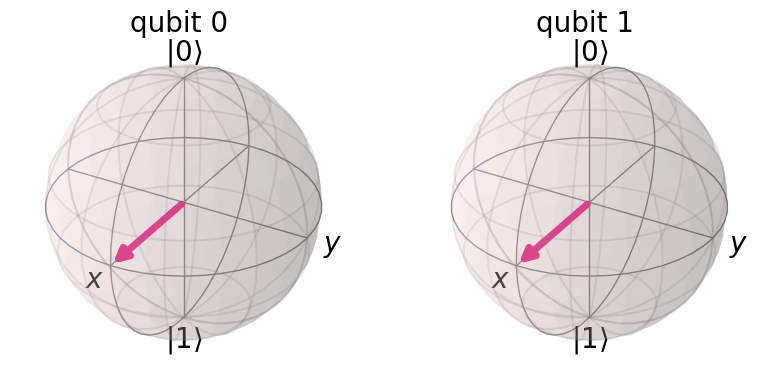

In [2]:
# CNOT |++> = |++>
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())

sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = sim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

┌───┐          
q_0: ┤ H ├───────■──
     ├───┤┌───┐┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

<IPython.core.display.Latex object>

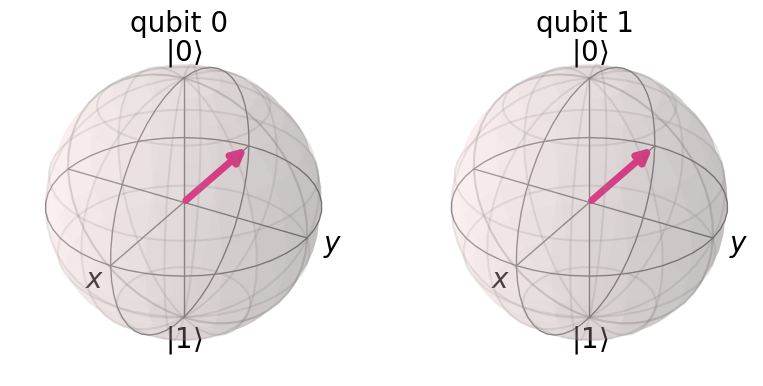

In [3]:
# CNOT |-+> = |-->
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
display(qc.draw())

sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = sim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

```
Therefore, wrapping the CNOT with Hadamard gates flips the behaviour of
the control and target qubits
```

In [4]:
# Verifying that ((H (*) H) CNOT (H (*) H)) |q1q0> = CNOT |q0q1>
import numpy as np

H    = 1/(2**0.5) * np.array([[1,1],
                              [1,-1]])
CNOT = np.array([[1, 0, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0],
                 [0, 1, 0, 0]])

result1 = np.around(np.matmul(np.matmul(np.kron(H, H), CNOT), np.kron(H, H)))
print('((H (*) H) CNOT (H (*) H)) is:')
print(result1)

CNOT_other_representation = np.array([[1, 0, 0, 0], # as given in Nielsen and Chuang/Wikipedia
                                      [0, 1, 0, 0],
                                      [0, 0, 0, 1],
                                      [0, 0, 1, 0]])

print(np.array_equal(CNOT_other_representation, result1))

((H (*) H) CNOT (H (*) H)) is:
[[ 1. -0. -0.  0.]
 [-0.  1.  0. -0.]
 [ 0. -0. -0.  1.]
 [-0.  0.  1. -0.]]
True


In [5]:
# Verifying the above with qiskit
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
display(array_to_latex(unitary, prefix="\\text{Circuit = }\n"))

qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

<IPython.core.display.Latex object>

┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

<IPython.core.display.Latex object>

```
This is an example of phase kickback

X|-> = -|->

When the control qubit is |0> or |1>, 
the phase affected is the global phase (the change is not observable)
CNOT |-0> = |-> (*) |0>
          = |-0>

CNOT |-1> = X|-> (*) |1>
          = -|-> (*) |1>
          = -|-1>

But, if the control qubit is in superposition, 
the phase factor applied by the component of |1> in the control qubit
introduces a relative phase
CNOT |-+> = (1/root(2)) (CNOT |-0> + CNOT |-1>)
          = (1/root(2)) (|-0> + X|-1>)
          = (1/root(2)) (|-0> - |-1>)
          = |->  (*)  (1/root(2)) (|0> - |1>)
          = |-->

Wrapping CNOT with H gates transforms the {|0>, |1>} basis to the {|+>, |->}
This is useful in hardwares that allow CNOTs in 1 direction only
```

In [6]:
# Controlled T Gate
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw()

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

### Controlled Gate

```
T Gate = [1           0]
         [0 exp(i*pi/4)]

Controlled-U Gate (any gate)
If U = [u00 u01]
       [u10 u11]

Controlled-U = [1 0 0     0]
               [0 1 0     0]
               [0 0 u00 u01]
               [0 0 u10 u11]


In Qiskit Notation,
Controlled-U = [1 0   0   0]
               [0 u00 0 u01]
               [0 0   1   0]
               [0 u10 0 u11]

On its own, T-gate adds a phase of exp(i*pi/4) : T|1> = exp(i*pi/4)|1> 
This phase is global and therefore unobservable
However, with controlled-T and |+> as the control qubit, we get

(in Qiskit notation)
|1+> = |1> (*) (1/root(2)) (|0> + |1>)
     = (1/root(2)) (|10> + |11>)

Controlled-T |1+> = (1/root(2)) (|10> + exp(i*pi/4)|11>)
                  = |1> (*) (1/root(2)) (|0> + exp(i*pi/4)|1>)

Keeps the target qubit the same |1>
Rotates the control qubit about the Z-axis of the bloch sphere
```

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

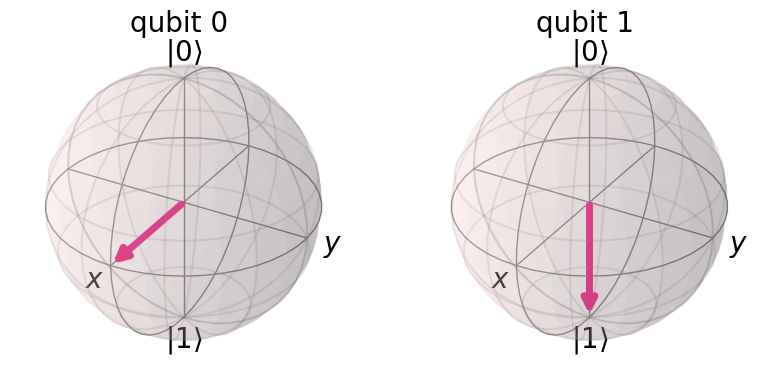

In [7]:
# Preparing state |1+>
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)
sim = Aer.get_backend('aer_simulator')
final_state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ X ├─■───────
     └───┘

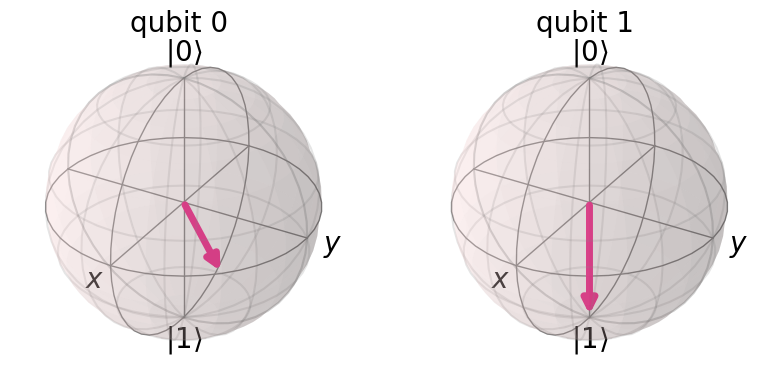

In [8]:
# Applying controlled-T to |1+>
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(pi/4, 0, 1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)
sim = Aer.get_backend('aer_simulator')
final_state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

```
Since there is no clear control/target qubit, qiskit draws the control gates
with 2 control qubits instead
```

┌───┐         
q_0: ┤ H ├─■───────
     └───┘ │P(π/4) 
q_1: ──────■───────

<IPython.core.display.Latex object>

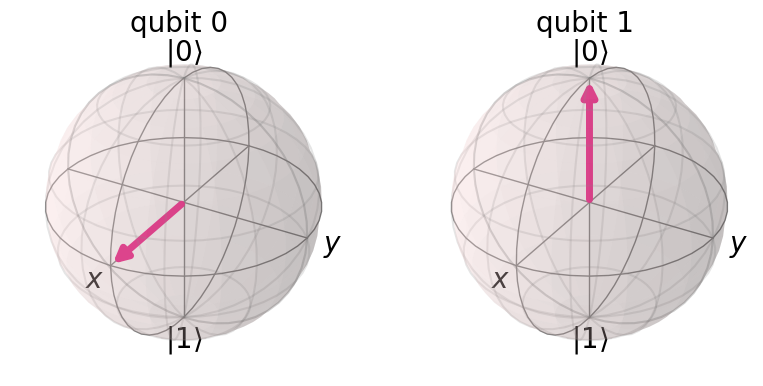

In [9]:
# Applying controlled-T on |0+>
qc = QuantumCircuit(2)
qc.h(0)
qc.cp(pi/4, 0, 1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)
sim = Aer.get_backend('aer_simulator')
final_state = sim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

```
|0+> stays as |0+> after applying controlled-T
```

┌───┐          
q_0: ┤ H ├─■────────
     ├───┤ │P(-π/4) 
q_1: ┤ X ├─■────────
     └───┘

<IPython.core.display.Latex object>

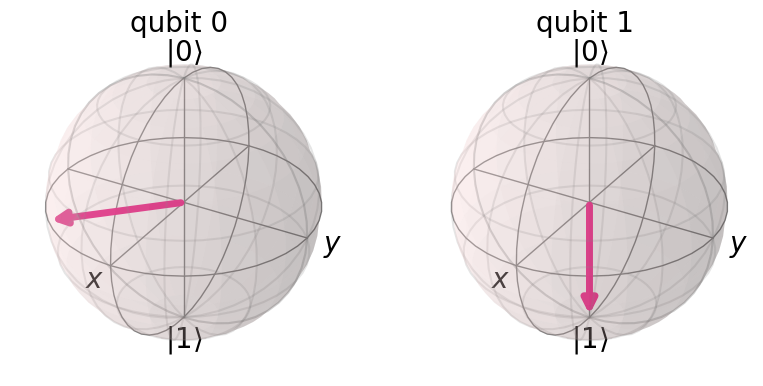

In [10]:
# Applying controlled-Sdg on |1+>
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(-pi/4, 0, 1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)
sim = Aer.get_backend('aer_simulator')
final_state = sim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

┌───┐         
q_0: ┤ X ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ X ├─■───────
     └───┘

<IPython.core.display.Latex object>

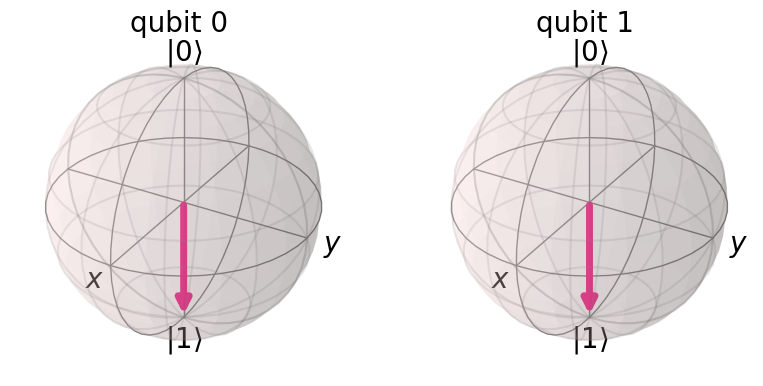

In [11]:
# controlled-T on |11>
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.cp(pi/4, 0, 1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)
sim = Aer.get_backend('aer_simulator')
final_state = sim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

```
Controlled-T on |11> applies a global phase of e^(i*pi/4)
Controlled-T |11> = Controlled-T [ 0 ]
                                 [ 0 ]
                                 [ 0 ]
                                 [ 1 ]

                  = [ 0          ]
                    [ 0          ]
                    [ 0          ]
                    [ e^(i*pi/4) ]
```